In [1]:
from datetime import datetime, timedelta
import itertools
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import time
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter, defaultdict
import seaborn as sns
import re
import math
from datetime import datetime

# load data

In [2]:
data = pd.read_csv("./Zillow-Fremont-history.csv")
print data.shape

(37914, 10)


In [3]:
data.built = 2017 - data.built
data.rename(columns={'year':'daysToNow'}, inplace=True)
data.drop("house_id", axis=1, inplace=True)

data.head()

,zipcode,area,bet,bath,sqft,type,built,daysToNow,price
0,94555.0,Northgate,4.0,1.0,1400.0,Single Family,47.0,0.0,986436.0
1,94555.0,Northgate,4.0,1.0,1400.0,Single Family,47.0,6620.0,292000.0
2,94555.0,Northgate,4.0,1.0,1400.0,Single Family,47.0,4532.0,140000.0
3,94555.0,Northgate,4.0,1.0,1400.0,Single Family,47.0,NaN,NaN
4,94555.0,Northgate,4.0,1.0,1400.0,Single Family,47.0,NaN,NaN


# remove rows

In [4]:
print data.shape
ind = data.isnull().sum(1) == 0
data = data.loc[ind, :]
print data.shape

(37914, 9)
(19618, 9)


# convert to DF

In [5]:
cate_df = data.loc[:, ["zipcode", "area", "bet", "bath", "type"]]
cont_df = data.loc[:, ["sqft", "built", "price"]]

cate_df = cate_df.astype("str")

In [6]:
dummy_df = pd.get_dummies(cate_df)
print dummy_df.shape

(19618, 52)


In [7]:
df_full = pd.concat([cont_df, dummy_df], axis=1)
print df_full.shape
df_full.head()

(19618, 55)


,sqft,built,price,zipcode_94536.0,zipcode_94538.0,zipcode_94539.0,zipcode_94555.0,area_28 Palms,area_Ardenwood,area_Blacow,area_Brookvale,area_Cabrillo,area_Cameron Hills,area_Canyon Heights,area_Centerville,area_Cherry-Guardino,area_Downtown,area_East Industrial,area_Glenmoor,area_Grimmer,area_Irvington,area_Kimber-Gomes,area_Lakes and Birds,area_Mission Hills,area_Mission San Jose,area_Mission Valley,area_Niles,area_Northgate,area_Parkmont,area_South Sundale,area_Sundale,area_Vineyards-Avalon,area_Warm Springs,area_Weibel,bet_1.0,bet_2.0,bet_3.0,bet_4.0,bet_5.0,bet_6.0,bath_0.5,bath_1.0,bath_1.5,bath_2.0,bath_2.5,bath_3.0,bath_3.5,bath_4.0,bath_4.5,bath_5.0,bath_5.5,bath_6.0,type_Condo,type_Single Family,type_Townhouse
0,1400.0,47.0,986436.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1400.0,47.0,292000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1400.0,47.0,140000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1042.0,45.0,535006.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7,1042.0,45.0,225000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# model

In [8]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [9]:
X = df_full.drop('price', 1)
y = df_full.price
print X.shape
print y.shape

(19618, 54)
(19618,)


### LR

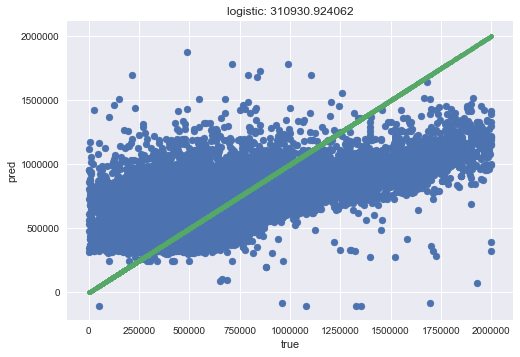

In [10]:
LR = linear_model.LinearRegression()
preds = cross_val_predict(LR, X, y, cv=5)
err = np.sqrt(mean_squared_error(y_pred=preds, y_true=y))
plt.scatter(x=y, y=preds)
plt.scatter(x=y,y=y, marker=".")
plt.xlabel("true")
plt.ylabel("pred")
plt.title("logistic: "+str(err))

### RF

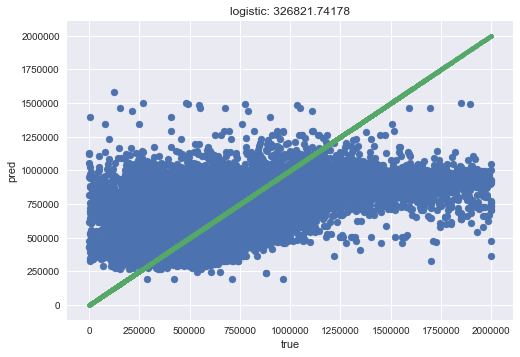

In [11]:
rep = 10
mat = []
for i in xrange(rep):
    RF = RandomForestRegressor()
    pred = cross_val_predict(RF, X, y, cv=5)
    mat.append(pred)
preds = np.array(mat).mean(0)
err = np.sqrt(mean_squared_error(y_pred=preds, y_true=y))
plt.scatter(x=y, y=preds)
plt.scatter(x=y,y=y, marker=".")
plt.xlabel("true")
plt.ylabel("pred")
plt.title("logistic: "+str(err))

In [12]:
RF.fit(X,y)
pd.DataFrame(zip(X.columns, RF.feature_importances_), columns=["feature", "importance"]).sort_values("importance", ascending=False).head(20)

,feature,importance
0,sqft,0.567714
4,zipcode_94539.0,0.128626
1,built,0.104718
52,type_Single Family,0.074826
42,bath_2.0,0.008125
44,bath_3.0,0.007284
36,bet_4.0,0.006757
43,bath_2.5,0.005538
35,bet_3.0,0.005408
37,bet_5.0,0.004603


# visualization

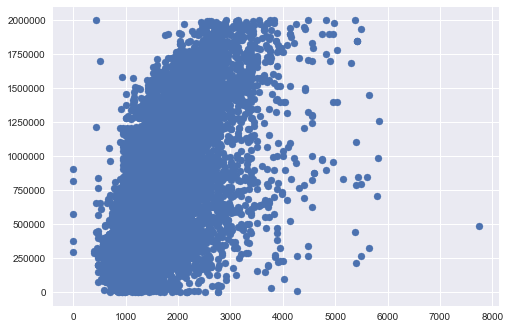

In [13]:
plt.scatter(x=data.sqft, y=data.price)

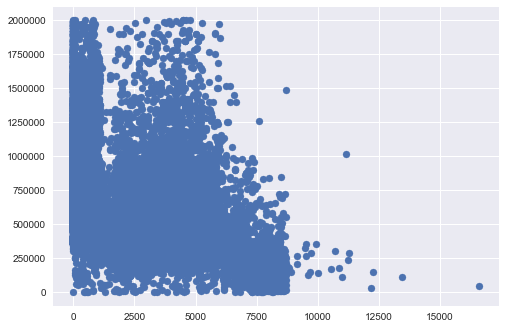

In [15]:
plt.scatter(x=data.daysToNow, y=data.price)